In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
import pandas as pd
import json
import bz2

from os import path

In [36]:
rundir = "/Users/cchivers/proj/chime_sims/output/2020_04_21_16_17_26/"
outdir = path.join(rundir, "output")
paramdir = path.join(rundir, "parameters")

In [37]:
df = pd.read_json(
    path.join(f"{outdir}", "chains.json.bz2"), orient="records", lines=True
)
df = df[df.iter > 1000]

In [47]:
#plt.plot(df['posterior'])

In [39]:
locs = [l.split("_")[-1] for l in df.columns if  "arr_" in l]
locs

['HUP', 'PAH', 'PMC']

In [40]:
census_ts_dict = {}
for loc in locs:
    census_ts_dict[loc] = pd.read_csv(path.join(paramdir, f"{loc}_census_ts.csv"))
    print(loc, census_ts_dict[loc].shape)

HUP (47, 4)
PAH (34, 4)
PMC (35, 4)


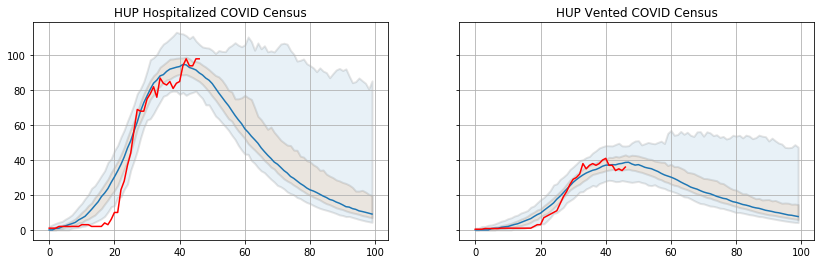

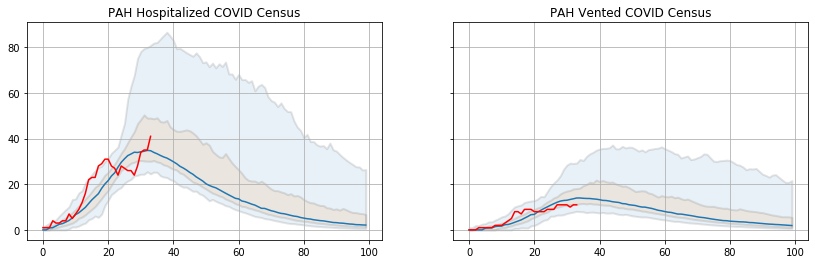

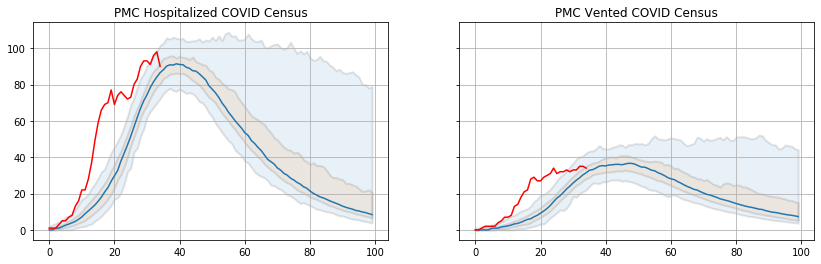

In [46]:
howfar = 100
for loc in locs:
    arrs = np.stack([df[f"arr_{loc}"].iloc[i] for i in range(df.shape[0])])
    arrq = np.quantile(arrs, axis=0, q=[0.025, 0.25, 0.5, 0.75, 0.975])
    fig, ax = plt.subplots(1,2, figsize=(14,4),sharey=True)
    axx = ax[0]
    axx.plot(arrq[2, :howfar, 3], "-", label="posterior median")
    axx.fill_between(
        x=range(howfar),
        y1=arrq[0, :howfar, 3],
        y2=arrq[4, :howfar, 3],
        label="95% Credible Region",
        alpha=0.1,
        lw=2,
        edgecolor="k",
    )
    axx.fill_between(
        x=range(howfar),
        y1=arrq[1, :howfar, 3],
        y2=arrq[3, :howfar, 3],
        label="50% Credible Region",
        alpha=0.1,
        lw=2,
        edgecolor="k",
    )
    census_ts = census_ts_dict[loc]
    axx.plot(
        range(census_ts.hosp.shape[0]),
        census_ts.hosp,
        "-",
        color="red",
        label="observed",
    )
    axx.set_title(f"{loc} Hospitalized COVID Census")
    axx.grid(True)
    
    axx = ax[1]
    axx.plot(arrq[2, :howfar, 5], "-", label="posterior median")
    axx.fill_between(
        x=range(howfar),
        y1=arrq[0, :howfar, 5],
        y2=arrq[4, :howfar, 5],
        label="95% Credible Region",
        alpha=0.1,
        lw=2,
        edgecolor="k",
    )
    axx.fill_between(
        x=range(howfar),
        y1=arrq[1, :howfar, 5],
        y2=arrq[3, :howfar, 5],
        label="50% Credible Region",
        alpha=0.1,
        lw=2,
        edgecolor="k",
    )
    axx.plot(
        range(census_ts.vent.shape[0]),
        census_ts.vent,
        "-",
        color="red",
        label="observed",
    )
    axx.set_title(f"{loc} Vented COVID Census")
    axx.grid(True)
    
    plt.show()